In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# 问题，将输入合并成一个数据，应该是很多条数据

In [2]:
# print
pd.set_option('display.max_columns', None) # 显示完整的列
pd.set_option('display.max_rows', None) # 显示完整的行
pd.set_option('display.expand_frame_repr', False) # 设置不折叠数据
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.unicode.east_asian_width',True)#设置列名对齐

In [8]:
# 公式中的乘是矩阵相乘

In [9]:
# 预处理

In [10]:
#转化为两行 其中每行的数据为 在一个类内同一个特征不同样本的值 
#两行数据代表一个类内两个特征不同样本的值

In [11]:
# w1 = np.mat([[2.95,6.63],[2.53,7.79],[3.57,5.65],[3.16,5.47]])
# w2 = np.mat([[2.58,4.46],[2.16,6.22],[3.27,3.52]])
w1 = np.mat([[1,0,1],[0,1,1]])
w2 = np.mat([[1,1,0],[0,1,0]])

In [12]:
w2

matrix([[1, 1, 0],
        [0, 1, 0]])

In [13]:
w1 = w1.T

In [14]:
w1

matrix([[1, 0],
        [0, 1],
        [1, 1]])

In [15]:
w2 = w2.T

In [17]:
w2

matrix([[1, 0],
        [1, 1],
        [0, 0]])

In [18]:
sz1 = np.size(w1,1)

In [19]:
sz2 = np.size(w2,1)

In [ ]:
一开始先看X空间内的离散度

![jupyter](picture/1.png)

In [20]:
m1 = np.mean(w1,axis = 1)
m2 = np.mean(w2,axis = 1)

In [ ]:
类均值向量

In [35]:
m1

matrix([[0.5],
        [0.5],
        [1. ]])

In [22]:
m2

matrix([[0.5],
        [1. ],
        [0. ]])

![](picture/2.png)

![](picture/4.png)

In [22]:
 # 总样本类内散度矩阵
    # /....不是一个
    # 其实就是协方差矩阵之和
    S_w = np.cov(x_0.T) + np.cov(x_1.T) # np.cov()求特征的协方差，默认一列表示一个样本，但我们传入的是一行表示一个样本，所以要先进行转置
    # 样本类间离散度矩阵
    S_b = np.matmul((mean_0 - mean_1).reshape(-1,1), (mean_0 - mean_1).reshape(1,-1))


IndentationError: unexpected indent (<ipython-input-22-c8f2ea89aaa3>, line 3)

In [23]:
s1 = np.zeros((w1.shape[0],w1.shape[0]))
s2 = np.zeros((w2.shape[0],w2.shape[0]))

In [37]:
s1

matrix([[ 0.562875, -1.23795 ],
        [-1.23795 ,  3.4115  ]])

In [41]:
tmp = w1[:,i] - m1

In [26]:
tmp

matrix([[ 0.6       ],
        [-1.21333333]])

In [24]:
# 第一类的Si
# tmp 是 每一个
# 一个元素有两个参数，看这两个参数和平均值的差值，相乘然后累加
for i in range(w1.shape[1]):
    tmp = w1[:,i] - m1
    s1 = s1 + tmp*tmp.T
#     print(s1)
# 第二类的Si
for i in range(w2.shape[1]):
    tmp = w2[:,i] - m2
    s2 = s2 + tmp*tmp.T
sw = (sz1*s1+sz2*s2)/(sz1+sz2)

In [ ]:
#类内离散度矩阵

In [25]:
s1

matrix([[ 0.5, -0.5,  0. ],
        [-0.5,  0.5,  0. ],
        [ 0. ,  0. ,  0. ]])

In [26]:
s2

matrix([[0.5, 0. , 0. ],
        [0. , 0. , 0. ],
        [0. , 0. , 0. ]])

In [ ]:
类间离散度矩阵

In [27]:
sw

matrix([[ 0.5 , -0.25,  0.  ],
        [-0.25,  0.25,  0.  ],
        [ 0.  ,  0.  ,  0.  ]])

In [38]:
w1[:,1]

matrix([[2.53],
        [7.79]])

In [36]:
sw

matrix([[ 0.59087143, -1.3338    ],
        [-1.3338    ,  3.5596    ]])

![](picture/3.png)

In [29]:
sb = (m1-m2)*(m1-m2).T

In [30]:
sb

matrix([[ 0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.25, -0.5 ],
        [ 0.  , -0.5 ,  1.  ]])

In [33]:
sw

matrix([[ 0.5 , -0.25,  0.  ],
        [-0.25,  0.25,  0.  ],
        [ 0.  ,  0.  ,  0.  ]])

In [52]:
np.linalg.inv(sw)

matrix([[10.97816928,  4.11357517],
        [ 4.11357517,  1.82230772]])

In [53]:
m1

matrix([[3.0525],
        [6.385 ]])

![](picture/6.png)

In [34]:
w_star = np.linalg.inv(sw)*(m1-m2)

LinAlgError: Singular matrix

In [ ]:
w_star 是一个确定的值,参数判别函数

In [ ]:
看y空间(一维)离散度

In [ ]:
计算w0，初始偏移，类似截距

![](picture/7.png)
![](picture/8.png)

In [49]:
w_star

matrix([[10.99340474],
        [ 4.58328742]])

In [48]:
# 先求类均值
res1 = 0
for i in range(sz1):
    res1 = res1 + w1[:,i].T*w_star
res1/=sz1
# print(res1)
res2 = 0
for i in range(sz2):
    res2 = res2+w2[:,i].T*w_star
    
w0 = -(res1*sz1+res2*sz2)/(sz1+sz2)


[[62.82165819]]


In [54]:
get_line(w_star, w0)

(array([1.        , 1.08163265, 1.16326531, 1.24489796, 1.32653061,
        1.40816327, 1.48979592, 1.57142857, 1.65306122, 1.73469388,
        1.81632653, 1.89795918, 1.97959184, 2.06122449, 2.14285714,
        2.2244898 , 2.30612245, 2.3877551 , 2.46938776, 2.55102041,
        2.63265306, 2.71428571, 2.79591837, 2.87755102, 2.95918367,
        3.04081633, 3.12244898, 3.20408163, 3.28571429, 3.36734694,
        3.44897959, 3.53061224, 3.6122449 , 3.69387755, 3.7755102 ,
        3.85714286, 3.93877551, 4.02040816, 4.10204082, 4.18367347,
        4.26530612, 4.34693878, 4.42857143, 4.51020408, 4.59183673,
        4.67346939, 4.75510204, 4.83673469, 4.91836735, 5.        ]),
 matrix([[19.75351817],
         [19.55771531],
         [19.36191244],
         [19.16610958],
         [18.97030672],
         [18.77450386],
         [18.578701  ],
         [18.38289813],
         [18.18709527],
         [17.99129241],
         [17.79548955],
         [17.59968668],
         [17.40388382],
      

In [55]:
w_star

matrix([[10.99340474],
        [ 4.58328742]])

In [51]:
# 判别函数

In [19]:
def get_res(w1,w2,X, w0 ,w_star):
    res = X * w_star + w0
    if res >=0:
        print('合格')
        w1=np.append(w1, X, axis=0)
    else:
 
        print('不合格')
        w2=np.append(w2, X, axis=0)
    return w1,w2


In [20]:
def get_line(w, w0):
    # 画两类之间的分界线
    w = np.array(w)
    x = np.linspace(1, 5, 50)
    #print(x)
    y = -w[0,0]*x/w[1,0]-w0/w[1,0]
    #权向量，对应wi  w0 为常数项，y = w2*x2 + w1*x1 + w0
    y=y.reshape(-1,1)#将行向量转置
    return x, y


In [21]:
def show_fig(w):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.scatter(np.array(w1[:,0]), np.array(w1[:,1]),c='r')
    ax1.scatter(np.array(w2[:,0]), np.array(w2[:,1]),c='y')
    ax1.plot(wx,wy) 
    ax1.scatter(np.array(w[0,0]), np.array(w[0,1]),c='b')
    plt.show()

In [15]:
def fisher(w1, w2):    
    #将行向量转置为列向量
    w1=w1.T
    w2=w2.T
 
    sz1 = np.size(w1,1)
    sz2 = np.size(w2,1)
    
    #  1.求wi均值
    m1 = np.mean(w1, axis=1)
    m2 = np.mean(w2, axis=1)
  
    # 2.计算样本内离散度 Si 和总类内离散度矩阵 Sw
    s1 = np.zeros((w1.shape[0],w1.shape[0]))
    for i in range(w1.shape[1]):#共有w1.shape[1]个样本
        
        tmp = w1[:,i] - m1
        s1 = s1 + tmp * tmp.T
        
    s2 =  np.zeros((w2.shape[0],w2.shape[0]))
    for i in range(w2.shape[1]):
        tmp = w2[:,i] - m2
        s2 = s2 + tmp * tmp.T
    sw = (sz1*s1 + sz2*s2)/(sz1+sz2)
 
    # 3.计算样本间离散度 sb
    sb = (m1 - m2) * (m1 - m2).T
 
    # 4.计算w_star
    w_star = np.linalg.inv(sw) * (m1-m2)
    
 
    #计算类均值
    res1=0
    for i in range(sz1):
        res1 = res1 + w1[:,i].T*w_star
    res1/=sz1
    
    res2=0
    for i in range(sz2):
        res2 = res2 +w2[:,i].T*w_star
        print(res2)
    res2/=sz2
    print(res1)
    #return -(m1+m2)/2, w_star
    return -(res1*sz1+res2*sz2)/(sz1+sz2), w_star

In [16]:
w1 = np.mat([[2.95, 6.63], [2.53, 7.79], [3.57, 5.65],[3.16,5.47]])
w2 = np.mat([[2.58, 4.46], [2.16, 6.22], [3.27, 3.52]])
    
w0,w_star=fisher(w1, w2)

[[48.80444615]]
[[101.05824818]]
[[153.13985343]]
[[62.82165819]]


In [17]:
w0

matrix([[-57.77521231]])

In [ ]:
if __name__ == '__main__':
  
    w1 = np.mat([[2.95, 6.63], [2.53, 7.79], [3.57, 5.65],[3.16,5.47]])
    w2 = np.mat([[2.58, 4.46], [2.16, 6.22], [3.27, 3.52]])
    
    w0,w_star=fisher(w1, w2)
    
    fig = plt.figure()
    ax1 = fig.add_subplot(111)#画布布局
    ax1.scatter(np.array(w1[:,0]), np.array(w1[:,1]),c='r')#x,y,cl
    ax1.scatter(np.array(w2[:,0]), np.array(w2[:,1]),c='y')#
    wx,wy=get_line(w_star, w0)
    #plot(wx,wy)
    # print(wy)
    #wx=[wx]
    #显示分类情况
    ax1.plot(wx,wy)    
    plt.show()
 
    while True:       
        n1,n2= map(float,input().split())
        #print(n1,n2)
        w=np.mat([n1,n2])
        show_fig(w)
        w1,w2=get_res(w1,w2,w,np.array(w0),w_star)


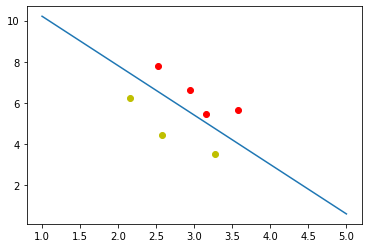

1 2


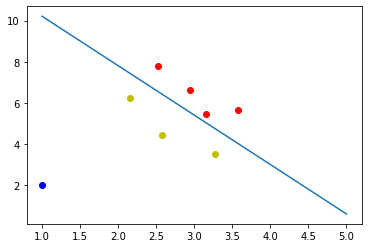

不合格
4.5 7


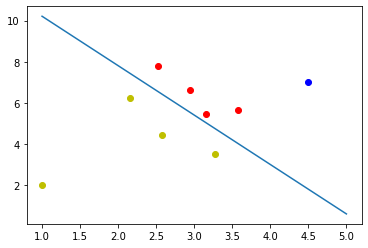

合格


In [ ]:

 
def fisher(w1, w2):    
    #将行向量转置为列向量
    w1=w1.T
    w2=w2.T
 
    sz1 = np.size(w1,1)
    sz2 = np.size(w2,1)
    
    #  1.求wi均值
    m1 = np.mean(w1, axis=1)
    m2 = np.mean(w2, axis=1)
  
    # 2.计算样本内离散度 Si 和总类内离散度矩阵 Sw
    s1 = np.zeros((w1.shape[0],w1.shape[0]))
    for i in range(w1.shape[1]):#共有w1.shape[1]个样本
        
        tmp = w1[:,i] - m1
        s1 = s1 + tmp * tmp.T
 
    s2 =  np.zeros((w2.shape[0],w2.shape[0]))
    for i in range(w2.shape[1]):
        tmp = w2[:,i] - m2
        s2 = s2 + tmp * tmp.T
    sw = (sz1*s1 + sz2*s2)/(sz1+sz2)
 
    # 3.计算样本间离散度 sb
    sb = (m1 - m2) * (m1 - m2).T
 
    # 4.计算w_star
    w_star = np.linalg.inv(sw) * (m1-m2)
    
 
    #计算类均值
    res1=0
    for i in range(sz1):
        res1 = res1 + w1[:,i].T*w_star
    res1/=sz1
    
    res2=0
    for i in range(sz2):
        res2 = res2 +w2[:,i].T*w_star
    res2/=sz2
    
    '''
    # 4.另外一种计算 w_star的方式,
    #求sw^(-1)*sb 的特征值，特征向量
    t = np.linalg.inv(sw)*sb
    v, Q = np.linalg.eig(t)
    
    #找到最大特征值对应的特征向量
    res_pos = v.argmax(axis=0)
    w_star2 = Q[:,res_pos]
    
    #计算 sw^(-1/2) 
    v2,Q2 =np.linalg.eig(sw)
    
    v_half=np.zeros((v2.size,v2.size))
    for i in range(v2.size):
        v_half[i][i]=math.sqrt(v2[i])
    sw_half=Q2 * v_half*(Q2**(-1))
    
    #最后的结果为 sw^(-1/2)*w_star
    sw_half=sw_half**(-1)
    w_star2=sw_half*w_star2
    res1=0
    for i in range(sz1):
        res1 = res1 + w1[:,i].T*w_star2
    res1/=sz1
    
    res2=0
    for i in range(sz2):
        res2 = res2 +w2[:,i].T*w_star2
    res2/=sz2
    '''
    #return -(m1+m2)/2, w_star
    return -(res1*sz1+res2*sz2)/(sz1+sz2), w_star

def get_res(w1,w2,X, w0 ,w_star):
    res = X * w_star + w0
    if res >=0:
        print('合格')
        w1=np.append(w1, X, axis=0)
        #print(w1)
    else:
 
        print('不合格')
        w2=np.append(w2, X, axis=0)
    return w1,w2
    
    
def get_line(w, w0):
    # 换两类之间的分界线
    w = np.array(w)
    x = np.linspace(1, 5, 50)
    #print(x)
    y = -w[0,0]*x/w[1,0]-w0/w[1,0]
    y=y.reshape(-1,1)#将行向量转置
    return x, y
 
def show_fig(w):
     fig = plt.figure()
     ax1 = fig.add_subplot(111)
     ax1.scatter(np.array(w1[:,0]), np.array(w1[:,1]),c='r')
     ax1.scatter(np.array(w2[:,0]), np.array(w2[:,1]),c='y')
     ax1.plot(wx,wy) 
     ax1.scatter(np.array(w[0,0]), np.array(w[0,1]),c='b')
     plt.show()
 
 
if __name__ == '__main__':
  
    w1 = np.mat([[2.95, 6.63], [2.53, 7.79], [3.57, 5.65],[3.16,5.47]])
    w2 = np.mat([[2.58, 4.46], [2.16, 6.22], [3.27, 3.52]])
    
    w0,w_star=fisher(w1, w2)
#     w0 = 0
    
    fig = plt.figure()
    ax1 = fig.add_subplot(111)#画布布局
    ax1.scatter(np.array(w1[:,0]), np.array(w1[:,1]),c='r')#x,y,cl
    ax1.scatter(np.array(w2[:,0]), np.array(w2[:,1]),c='y')#
    wx,wy=get_line(w_star, w0)
    #plot(wx,wy)
    # print(wy)
    #wx=[wx]
    #显示分类情况
    ax1.plot(wx,wy)    
    plt.show()
 
    #输入样例
    while True:       
        n1,n2= map(float,input().split())
        #print(n1,n2)
        w=np.mat([n1,n2])
        show_fig(w)
        w1,w2=get_res(w1,w2,w,np.array(w0),w_star)